# Spaceship Titanic🚀: Journey to Exoplanet🪐

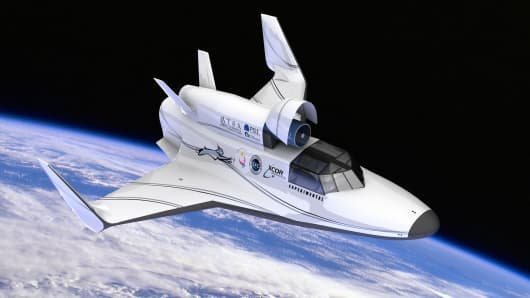

# Introduction
The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, we need to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Here we are !! saving them and changing history!

# Data Context

- **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - ***PassengerId*** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    - ***HomePlanet*** - The planet the passenger departed from, typically their planet of permanent residence.
    - ***CryoSleep*** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - ***Cabin*** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - ***Destination*** - The planet the passenger will be debarking to.
    - ***Age*** - The age of the passenger.
    - ***VIP*** - Whether the passenger has paid for special VIP service during the voyage.
    - ***RoomService, FoodCourt, ShoppingMall, Spa, VRDeck*** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - ***Name*** - The first and last names of the passenger.
    - ***Transported*** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
- **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data.

## 📝 Task
#### -> To predict whether the Passenger gets transported or not.

# Importing Libraries

In [ ]:
# Data analysis and wrangling
import numpy as np 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score


# Acquiring Data

The Pandas library mainly helps us with the analysis and manipulation of our datasets. There with the help of that we will be loading our Training and Test datasets.

## Training Data

In [ ]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

In [ ]:
print('Rows and columns in training dataset : ',train_data.shape)

## Test Data

In [ ]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

In [ ]:
print('Rows and columns in training dataset : ',test_data.shape)

In [ ]:
train_data.info()

In [ ]:
test_data.info()

**What are the data types for various features?**

- Six features are floats.
- Six features are strings (object).
- One Boolean (Target Variable) in case of Training dataset.

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- **Categorical :** HomePlanet, Cryosleep, Destination, VIP.

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- **Continuous :** Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

- Destination is a mix of categorical and alphanumeric data types. Cabin is alphanumeric.

## Descriptive Statistical Analysis

### For Training data

In [ ]:
train_data.describe()

### For Test data

In [ ]:
test_data.describe()

# Data Analysis and Preprocessing

## Checking NULL values

In [ ]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(train_data)

In [ ]:
missingValuesInfo(test_data)

**Which features contain blank, null or empty values?**

These will require correcting.

- CryoSleep > ShoppingMall > VIP ; features contain a number of null values in that order for the training dataset.
- FoodCourt > Spa are incomplete in case of test dataset.

### How different categorical features wise people got Transported?

In [ ]:
train_data[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

In [ ]:
train_data[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

In [ ]:
train_data[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

In [ ]:
train_data[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

In [ ]:
spaceship_train_data = train_data.copy()
spaceship_test_data = test_data.copy()

## Handling null values and unnecessary features

### Training Data

In [ ]:
spaceship_train_data.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

spaceship_train_data['CryoSleep'] = spaceship_train_data['CryoSleep'].fillna(spaceship_train_data['CryoSleep'].mode()[0])
spaceship_train_data['ShoppingMall'] = spaceship_train_data['ShoppingMall'].fillna(spaceship_train_data['ShoppingMall'].median())
spaceship_train_data['VIP'] = spaceship_train_data['VIP'].fillna(spaceship_train_data['VIP'].mode()[0])
spaceship_train_data['HomePlanet'] = spaceship_train_data['HomePlanet'].fillna(spaceship_train_data['HomePlanet'].mode()[0])
spaceship_train_data['VRDeck'] = spaceship_train_data['VRDeck'].fillna(spaceship_train_data['VRDeck'].median())
spaceship_train_data['FoodCourt'] = spaceship_train_data['FoodCourt'].fillna(spaceship_train_data['FoodCourt'].median())
spaceship_train_data['Spa'] = spaceship_train_data['Spa'].fillna(spaceship_train_data['Spa'].median())
spaceship_train_data['Destination'] = spaceship_train_data['Destination'].fillna(spaceship_train_data['Destination'].mode()[0])
spaceship_train_data['RoomService'] = spaceship_train_data['RoomService'].fillna(spaceship_train_data['RoomService'].median())
spaceship_train_data['Age'] = spaceship_train_data['Age'].fillna(spaceship_train_data['Age'].median())

In [ ]:
spaceship_train_data.isnull().sum()

### Test Data

In [ ]:
spaceship_test_data.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

spaceship_test_data['CryoSleep'] = spaceship_test_data['CryoSleep'].fillna(spaceship_test_data['CryoSleep'].mode()[0])
spaceship_test_data['ShoppingMall'] = spaceship_test_data['ShoppingMall'].fillna(spaceship_test_data['ShoppingMall'].median())
spaceship_test_data['VIP'] = spaceship_test_data['VIP'].fillna(spaceship_test_data['VIP'].mode()[0])
spaceship_test_data['HomePlanet'] = spaceship_test_data['HomePlanet'].fillna(spaceship_test_data['HomePlanet'].mode()[0])
spaceship_test_data['VRDeck'] = spaceship_test_data['VRDeck'].fillna(spaceship_test_data['VRDeck'].median())
spaceship_test_data['FoodCourt'] = spaceship_test_data['FoodCourt'].fillna(spaceship_test_data['FoodCourt'].median())
spaceship_test_data['Spa'] = spaceship_test_data['Spa'].fillna(spaceship_test_data['Spa'].median())
spaceship_test_data['Destination'] = spaceship_test_data['Destination'].fillna(spaceship_test_data['Destination'].mode()[0])
spaceship_test_data['RoomService'] = spaceship_test_data['RoomService'].fillna(spaceship_test_data['RoomService'].median())
spaceship_test_data['Age'] = spaceship_test_data['Age'].fillna(spaceship_test_data['Age'].median())

In [ ]:
spaceship_train_data.isnull().sum()

Both training and test datasets are now free of any null values. Now we can proceed further for actual analysis of datasets.

# Data Visualization

## Checking the distribution of our Target variable i.e.*Transported*

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Transported',data=spaceship_train_data,palette=['#90ee90',"#FAAE7B"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('People Transported')
plt.show()

#### Observations:
- There seems to be no biasing in the data provided to us.
- About half of the passengers have been transported according to training dataset.

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='CryoSleep', hue='Transported', data=spaceship_train_data, palette='Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('CryoSleep Passengers Transported Distribution')
plt.show()

#### Observations:
- Majority of the passengers who were transported to Exoplanet were in cryosleep. We can truly say being in cryodenic sleep was more favoured by the passengers considering their health and ease of comfort.
- When it comes to passengers who were not transported, more didn't preferred cryosleep. We can say that this could be one of the factor that they were not allowed to transport.

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='VIP',hue='Transported', data=spaceship_train_data,palette=['#FBCCDB',"#BA44BF"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('VIP People Transported Distribution')
plt.show()

You all must have watched 2012 movie, in which the rich VIPs mostly with green card were given the main preference to board on evacuation ship. While poor people were stranded and struggling hard to get on ship. This could happen in real life in case apocalypse arrives. But here we are talking about intergalatical travel, so it would be interesting to check if the same preference given to VIPS here.

#### Observations:
- Well it clearly seems that being VIP won't work here.
- Here we need to consider one hidden case that there might be less rich people. But can surely see that ratio wise there was no biasing on passenger's status.
- This features seems to be overfitting.

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='HomePlanet', hue='Transported', data=spaceship_train_data, palette=['#114f5c',"#7ccdde"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('HomePlanet Passengers Transported to Different Destinations Distribution')
plt.show()

#### Observations:
- As Earth being our home planet, a large population residing over it. So the large mass of passengers being transported or not, are mostly from Earth.
- The total passengers with home Europa are more as compared to Mars, but transported ratio is less.

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='Destination', hue='Transported', data=spaceship_train_data, palette=['#fccf03',"#fc6b03"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('HomePlanet Passengers Transported to Different Destinations Distribution')
plt.show()

In [ ]:
fig = px.sunburst(spaceship_train_data, path=['HomePlanet', 'Destination', 'Transported'], width=800,
    height=800,title='Passengers Transported to Various Planets from different Home Locations',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

<div class="alert alert-block alert-info"> 📌 Click on various sections of chart to get more clear insights. Happy learning!!😃.</div>

#### Observations:
- For Home 'Earth'
    - Majority of Passengers transported to **TRAPPIST-1e** followed by the destination **55 Cancri e**.
    - Almost equal number of Passengers are transported to **55 Cancri e** and **PSO J318.5-22**.
- For Home 'Europa'
    - Majority of Passengers transported to **TRAPPIST-1e** followed by the destination **55 Cancri e**.
    - Very less number of Passengers are transported to **PSO J318.5-22**.
- For Home 'Mars'
    - Majority of Passengers transported to **TRAPPIST-1e** followed by the destination **55 Cancri e**.
    - Very less number of Passengers are transported to **PSO J318.5-22**.

    
##### So Passengers are mostly transported to *TRAPPIST-1e* planet. And the maximum passengers are transported from *EARTH*.

In [ ]:
services=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, name in enumerate(services):
    
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=spaceship_train_data, x=name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=spaceship_train_data, x=name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(name)
    
fig.tight_layout()
plt.show()

#### Observations:
- Most people don't spend much money on services provided
- People who are transported are mostly the ones who spent less.

In [ ]:
fig = px.scatter(spaceship_train_data,x='Age', y='RoomService', color='Transported')
fig.show()

#### Observations:
- We can clearly observe that Passengers with low **RoomService** charge are Transported the most.

In [ ]:
fig = px.scatter(spaceship_train_data,x='Age', y='VRDeck', color='Transported')
fig.show()

#### Observations:
- We can clearly observe that Passengers with low **VRDeck** charge are Transported the most.

In [ ]:
fig = px.scatter(spaceship_train_data,x='Age', y='Spa', color='Transported')
fig.show()

#### Observations:
- We can clearly observe that Passengers with low **SPA** charge are Transported the most.

## Age Distribution

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(19,8))
fig.suptitle('Age Histogram and Boxplot', size=22)
sns.histplot(x='Age', data=spaceship_train_data, hue='Transported', palette='husl', kde=True, element='step', ax=ax[0])
sns.boxplot(x='Transported', y='Age', data=spaceship_train_data, palette='Set2', ax=ax[1])
plt.show()


## Heatmap of Correlation

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
corr = spaceship_train_data.corr()
ax = sns.heatmap( corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),annot=True, square=True)

Heatmap of Correlation between different features:

<blockquote>Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.<br>
Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.</blockquote>

## Scaling the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

LABELS = spaceship_test_data.columns
for col in LABELS:
    # Check if object
    if spaceship_train_data[col].dtype == 'O':
        encoder = LabelEncoder()
        spaceship_train_data[col] = encoder.fit_transform(spaceship_train_data[col])
        spaceship_test_data[col] = encoder.transform(spaceship_test_data[col])
        
    elif spaceship_train_data[col].dtype == 'bool':
        spaceship_train_data[col] = spaceship_train_data[col].astype('int')
        spaceship_test_data[col] = spaceship_test_data[col].astype('int')
        
spaceship_train_data['Transported'] = spaceship_train_data['Transported'].astype('int')

col_age = ['Age']
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

scaler_mm = MinMaxScaler()
scaler_ss= StandardScaler()

# Apply Min-Max Scaling
spaceship_train_data[col_age] = scaler_mm.fit_transform(spaceship_train_data[col_age])
spaceship_test_data[col_age] = scaler_mm.transform(spaceship_test_data[col_age])

# Apply Standard Scaling
spaceship_train_data[cols] = scaler_ss.fit_transform(spaceship_train_data[cols])
spaceship_test_data[cols] = scaler_ss.transform(spaceship_test_data[cols])

In [ ]:
spaceship_train_data.head()

In [ ]:
spaceship_test_data.head()

# Data Modeling


## Splitting the datasets

In [ ]:
X_train = spaceship_train_data.drop('Transported',axis=1)
y_train = spaceship_train_data['Transported']
X_test = spaceship_test_data.copy()
X_train.shape, y_train.shape, X_test.shape

#### NOTE:
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification problem. We want to identify relationship between output (Transported or not) with other variables or features (Destination, Age, CryoSleep...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- K-Neighbors Classifier
- Support Vector Classifier 
- Gaussian Naive Bayes 
- Stochastic Gradient Descent Classifier
- XGBoost Classifier
- Gradient Boosting Classifier
- Perceptron

## Logistic Regression
Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc. 
Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:
<br>
P(Y=1|X) or P(Y=0|X)
<br>
It calculates the probability of dependent variable Y, given independent variable X. 
This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = round( lr.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_lr) + '%')

## Decision Tree Classifier
This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)

acc_dt = round(decision_tree.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_dt) + '%')

## Random Forest Classifier
The random forest algorithm is an expansion of decision tree, in that you first construct a multitude of decision trees with training data, then fit your new data within one of the trees as a “random forest.”
It, essentially, averages your data to connect it to the nearest tree on the data scale. Random forest models are helpful as they remedy for the decision tree’s problem of “forcing” data points within a category unnecessarily.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = round( rf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_rf) + '%')

## K-Neighbours Classifier
K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples. 
When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = round( knn.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

## Support Vector Classifier
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

acc_svc = round( svc.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

## Gaussian Naive Bayes
Gaussian Naive Bayes is a probabilistic classification algorithm based on applying Bayes' theorem with strong independence assumptions.
In the context of classification, independence refers to the idea that the presence of one value of a feature does not influence the presence of another (unlike independence in probability theory). 
Naive refers to the use of an assumption that the features of an object are independent of one another. In the context of machine learning, naive Bayes classifiers are known to be highly expressive, scalable, and reasonably accurate, but their performance deteriorates rapidly with the growth of the training set. 
A number of features contribute to the success of naive Bayes classifiers. Most notably, they do not require any tuning of the parameters of the classification model, they scale well with the size of the training data set, and they can easily handle continuous features.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_g = gaussian.predict(X_test)

acc_g = round( gaussian.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_g) + '%')

## Stochastic Gradient Descent Classifier
Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. 
In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

acc_sgd = round( sgd.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_sgd) + '%')

## XGBoost Classifier
The XGBoost or Extreme Gradient Boosting algorithm is a decision tree based machine learning algorithm which uses a process called boosting to help improve performance.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/XGBoost)

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

acc_xgb = round( xgb_classifier.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_xgb) + '%')

## Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. 
Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

acc_gbc = round( gbc.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_gbc) + '%')

## Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_perceptron) + '%')

## AdaBoosting Classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

acc_ada = round(ada.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_ada) + '%')

## LightGBM Classifier
LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks.

**Reference :** [Wikipedia](https://en.wikipedia.org/wiki/LightGBM)

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = round(lgbm.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_lgbm) + '%')

# Models Comparison and Evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Classifier', 'K-Nearest Classifier', 'Logistic Regression', 'Decision Tree Classifier',
              'Random Forest Classifier', 'Naive Bayes', 'Stochastic Gradient Descent Classifier','XGB Classifier','Gradient Boosting Classifier',
              'Perceptron', 'LightGBM Classifier','AdaBoost Classifier'],
    'Score': [acc_svc, acc_knn, acc_lr, acc_dt, acc_rf, acc_g, acc_sgd, acc_xgb, acc_gbc, acc_perceptron, acc_lgbm, acc_ada ]})
models.sort_values(by='Score', ascending=False)

#### Observations:
- Our **Random Forest** and **Decison Tree** models are performing the best for now with accuracy score of **92.94%**

# Visualising the Model Scores

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(20,8))
ax = sns.barplot(data=models,x='Model',y='Score')
for container in ax.containers:
   ax.bar_label(container)
plt.title('Models v/s Their accuracy scores')
plt.xticks(rotation=45)
plt.show()

#### Observations:
- Our top 3 models are:
    1. Random Forest and Decision Tree Classifiers **(92.94%)**
    2. XGB Classifier **(87.37%)**
    3. LightGBM Classifier **(84.16%)**

In [ ]:
predictions = rf.predict(spaceship_test_data)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

<div class="alert alert-block alert-info"> 📌 WORK IN PROGRESS.</div>

### <p style="text-align:center;"><span style="color:red">💬 Thanks for reading till the end!! If you liked the notebook till here then please do Upvote👍 and all ears to advice/remarks. I'll be making this notebook my classification playground. Stay in touch!!😃</span></p>
